# REAL TIME POLYMER QUALITY PREDICTION


## Importing the libraries & dataset

In [1]:
# IMPORTING THE LIBRARIES

import numpy as np                     
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# READING THE DATASET

data = pd.read_csv('Data_MFR_310.csv')

In [3]:
# CHECKING THE HEAD OF DATASET

data.head()

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
# CHECKING THE HEAD OF DATASET AGAIN

data.head()

,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


## Changing the name of features for sake of simplicity

In [6]:
# CHANGING THE NAME OF THE FEATURES FOR SAKE OF SIMPLICITY

new_data = pd.DataFrame(data = data.values, columns = ['Propylene Flow', 'Hydrogen Ratio', 'Pressure Controller','Level Controller', 'Liquefied Recycle Gas To R-310 Dome Top',
                                                   'Hydrogen Flow', 'Temperature Controller', 'MFR'])

## Changing the data types of each feature to respective data types 

In [7]:
new_data['Propylene Flow'] = pd.to_numeric(new_data['Propylene Flow'])

new_data['Hydrogen Ratio'] = pd.to_numeric(new_data['Hydrogen Ratio'])

new_data['Pressure Controller'] = pd.to_numeric(new_data['Pressure Controller'])

new_data['Level Controller'] = pd.to_numeric(new_data['Level Controller'])

new_data['Liquefied Recycle Gas To R-310 Dome Top'] = pd.to_numeric(new_data['Liquefied Recycle Gas To R-310 Dome Top'])

new_data['Hydrogen Flow'] = pd.to_numeric(new_data['Hydrogen Flow'])

new_data['Temperature Controller'] = pd.to_numeric(new_data['Temperature Controller'])

new_data['MFR'] = pd.to_numeric(new_data['MFR'])

In [8]:
# CHECKING THE info() OF THE DATASET

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Propylene Flow                           2486 non-null   float64
 1   Hydrogen Ratio                           2560 non-null   float64
 2   Pressure Controller                      2484 non-null   float64
 3   Level Controller                         2484 non-null   float64
 4   Liquefied Recycle Gas To R-310 Dome Top  2484 non-null   float64
 5   Hydrogen Flow                            2486 non-null   float64
 6   Temperature Controller                   2484 non-null   float64
 7   MFR                                      2564 non-null   float64
dtypes: float64(8)
memory usage: 160.4 KB


## Checking the correlations between the features

In [9]:
# CHECKING THE CORREALATIONS

new_data.corr()

,Propylene Flow,Hydrogen Ratio,Pressure Controller,Level Controller,Liquefied Recycle Gas To R-310 Dome Top,Hydrogen Flow,Temperature Controller,MFR
Propylene Flow,1.000000,-0.035846,-0.246382,0.207590,0.387429,0.280031,-0.157591,-0.247960
Hydrogen Ratio,-0.035846,1.000000,0.221576,0.104436,0.375745,0.226894,0.052967,0.316216
Pressure Controller,-0.246382,0.221576,1.000000,0.044294,0.064547,-0.152372,-0.036286,0.438837
Level Controller,0.207590,0.104436,0.044294,1.000000,0.289986,0.000157,-0.084688,-0.006452
Liquefied Recycle Gas To R-310 Dome Top,0.387429,0.375745,0.064547,0.289986,1.000000,0.246106,0.116090,0.233219
Hydrogen Flow,0.280031,0.226894,-0.152372,0.000157,0.246106,1.000000,0.103214,-0.208911
Temperature Controller,-0.157591,0.052967,-0.036286,-0.084688,0.116090,0.103214,1.000000,0.125628
MFR,-0.247960,0.316216,0.438837,-0.006452,0.233219,-0.208911,0.125628,1.000000


## Creating the heatmap of above Correlation matrix


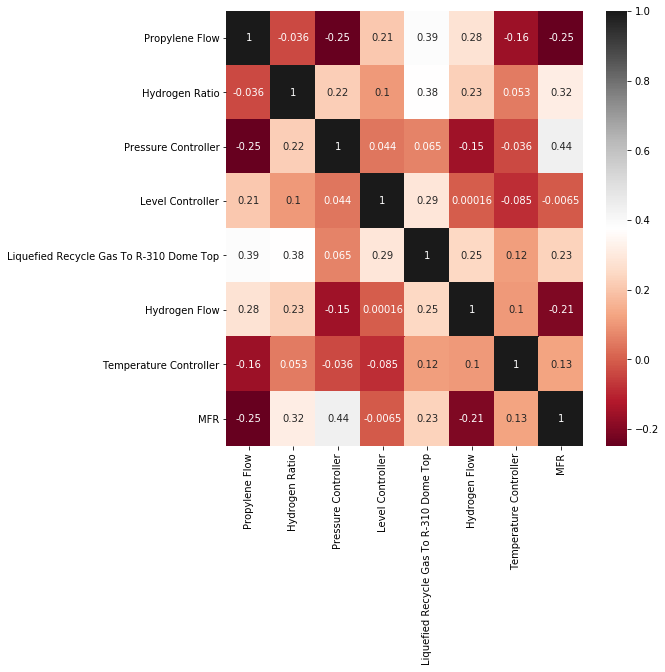

In [10]:
# GETTING THE LARGER SIZE OF AXES

plt.figure(figsize = (8,8)) 

# CREATING THE HEATMAP

sns.heatmap(new_data.corr(), annot = True, cmap = 'RdGy') 

## Exploratory data analysis

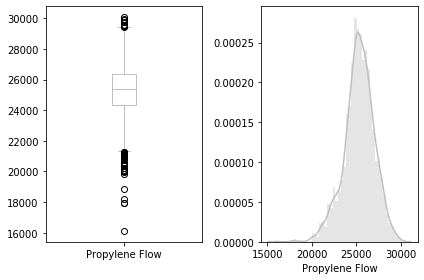

In [11]:
# CREATING SUBPLOTS FOR Propylene Flow

# BOXPLOT FOR Propylene Flow
plt.subplot(1,2,1)
new_data['Propylene Flow'].plot(kind = 'box', color = 'silver')

# DISTRIBUTION FOR Propylene Flow
plt.subplot(1,2,2)
sns.distplot(new_data['Propylene Flow'], color = 'silver')

plt.tight_layout()

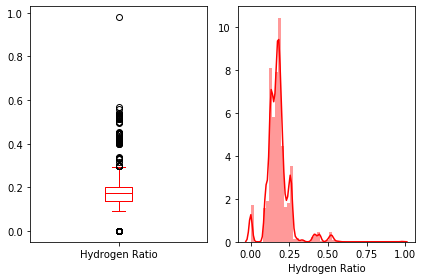

In [12]:
# CREATING SUBPLOTS FOR Hydrogen Ratio

# BOXPLOT FOR Hydrogen Ratio
plt.subplot(1,2,1)
new_data['Hydrogen Ratio'].plot(kind = 'box', color = 'red')

# DISTRIBUTION FOR Hydrogen Ratio
plt.subplot(1,2,2)
sns.distplot(new_data['Hydrogen Ratio'], color = 'red')

plt.tight_layout()

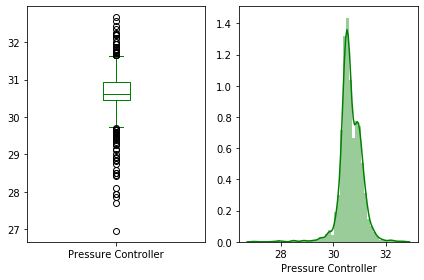

In [13]:
# CREATING SUBPLOTS FOR Pressure Controller

# BOXPLOT FOR Pressure Controller
plt.subplot(1,2,1)
new_data['Pressure Controller'].plot(kind = 'box', color = 'green')

# DISTRIBUTION FOR Pressure Controller
plt.subplot(1,2,2)
sns.distplot(new_data['Pressure Controller'], color = 'green')

plt.tight_layout()

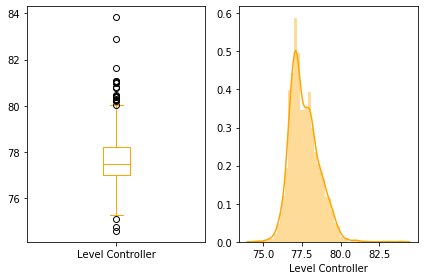

In [14]:
# CREATING SUBPLOTS FOR Level Controller

# BOXPLOT FOR Level Controller
plt.subplot(1,2,1)
new_data['Level Controller'].plot(kind = 'box', color = 'orange')

# DISTRIBUTION FOR Level controller
plt.subplot(1,2,2)
sns.distplot(new_data['Level Controller'], color = 'orange')

plt.tight_layout()

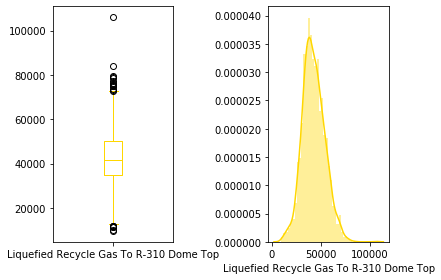

In [15]:
# CREATING SUBPLOTS FOR Liquefied Recycle Gas To R-310 Dome Top

# BOXPLOT FOR Liquefied Recycle Gas To R-310 Dome Top
plt.subplot(1,2,1)
new_data['Liquefied Recycle Gas To R-310 Dome Top'].plot(kind = 'box', color = 'gold')

# DISTRIBUTION FOR Liquefied Recycle Gas To R-310 Dome Top
plt.subplot(1,2,2)
sns.distplot(new_data['Liquefied Recycle Gas To R-310 Dome Top'], color = 'gold')

plt.tight_layout()

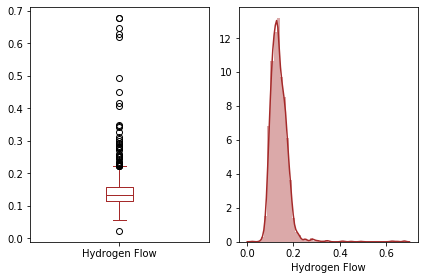

In [16]:
# CREATING SUBPLOTS FOR Hydrogen Flow

# BOXPLOT FOR Hydrogen Flow
plt.subplot(1,2,1)
new_data['Hydrogen Flow'].plot(kind = 'box', color = 'brown')

# DISTRIBUTION FOR Hydrogen Flow
plt.subplot(1,2,2)
sns.distplot(new_data['Hydrogen Flow'], color = 'brown')

plt.tight_layout()

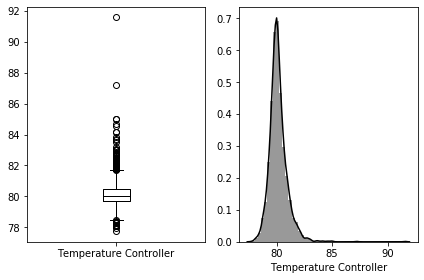

In [17]:
# CREATING SUBPLOTS FOR Temperature Controller

# BOXPLOT FOR Temperature Controller
plt.subplot(1,2,1)
new_data['Temperature Controller'].plot(kind = 'box', color = 'black')

# DISTRIBUTION FOR Temperature Controller
plt.subplot(1,2,2)
sns.distplot(new_data['Temperature Controller'], color = 'black')

plt.tight_layout()

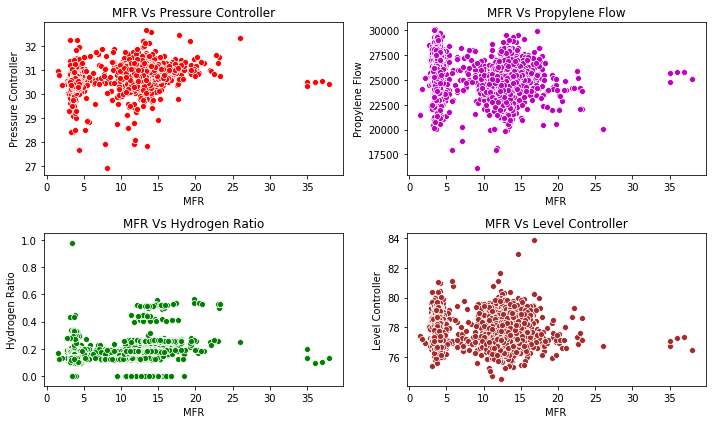

In [18]:
# CREATING DIFFERENT SCATTERPLOTS

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.scatterplot(x='MFR',y='Pressure Controller',data=new_data,color='r')
plt.title('MFR Vs Pressure Controller')


plt.subplot(2,2,2)
sns.scatterplot(x='MFR',y='Propylene Flow',data=new_data,color='m')
plt.title('MFR Vs Propylene Flow')


plt.subplot(2,2,3)
sns.scatterplot(x='MFR',y='Hydrogen Ratio',data=new_data,color='g')
plt.title('MFR Vs Hydrogen Ratio')


plt.subplot(2,2,4)
sns.scatterplot(x='MFR',y='Level Controller',data=new_data,color='brown')
plt.title('MFR Vs Level Controller')

plt.tight_layout()

Text(0.5, 1.0, 'MFR Vs Liquefied Recycle Gas To R-310 Dome Top')

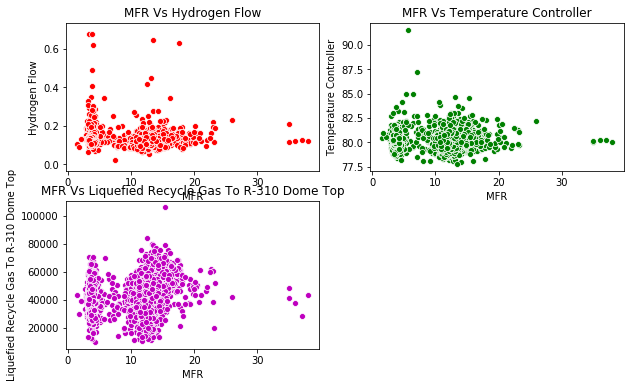

In [19]:
# CREATING DIFFERENT SCATTERPLOTS

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.scatterplot(x='MFR',y='Hydrogen Flow',data=new_data,color='r')
plt.title('MFR Vs Hydrogen Flow')


plt.subplot(2,2,2)
sns.scatterplot(x='MFR',y='Temperature Controller',data=new_data,color='g')
plt.title('MFR Vs Temperature Controller')

plt.subplot(2,2,3)
sns.scatterplot(x='MFR',y='Liquefied Recycle Gas To R-310 Dome Top',data=new_data,color='m')
plt.title('MFR Vs Liquefied Recycle Gas To R-310 Dome Top')

# DATA PREPROCESSING

In [20]:
# CHECKING THE HEAD OF DATA

new_data.head()

,Propylene Flow,Hydrogen Ratio,Pressure Controller,Level Controller,Liquefied Recycle Gas To R-310 Dome Top,Hydrogen Flow,Temperature Controller,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [21]:
# CHECKING THE info() OF DATASET

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Propylene Flow                           2486 non-null   float64
 1   Hydrogen Ratio                           2560 non-null   float64
 2   Pressure Controller                      2484 non-null   float64
 3   Level Controller                         2484 non-null   float64
 4   Liquefied Recycle Gas To R-310 Dome Top  2484 non-null   float64
 5   Hydrogen Flow                            2486 non-null   float64
 6   Temperature Controller                   2484 non-null   float64
 7   MFR                                      2564 non-null   float64
dtypes: float64(8)
memory usage: 160.4 KB


It is found that there are many null values in the dataset so we have to fill null-values with some values. 

## Handling the Null Values in dataset

In [22]:
# CHECKING THE SUM OF NULL VALUES IN EACH FEATURE 

new_data.isnull().sum()

Propylene Flow                             78
Hydrogen Ratio                              4
Pressure Controller                        80
Level Controller                           80
Liquefied Recycle Gas To R-310 Dome Top    80
Hydrogen Flow                              78
Temperature Controller                     80
MFR                                         0
dtype: int64

## Visualising the null values in dataset

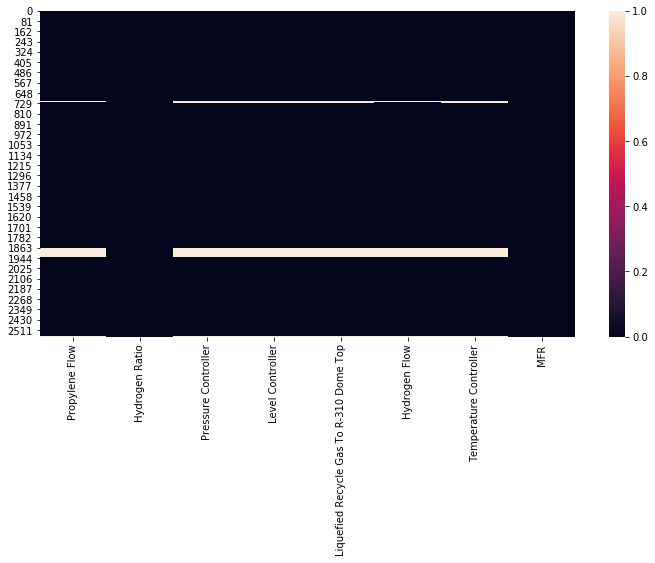

In [23]:
# GETTING THE LARGER SIZE OF AXES

plt.figure(figsize = (12,6))

# CREATING THE HEATMAP

sns.heatmap(new_data.isnull())

In [24]:
# IMPORTING THE CLASS FOR FILLING THE MISSING VALUES BY MODE IN DATASET

from sklearn.impute import SimpleImputer


impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [25]:
# FILLING THE MISSING VALUES WITH MEAN IN Propylene Flow

new_data['Propylene Flow'] = impute.fit_transform(new_data['Propylene Flow'].values.reshape(-1,1))

In [26]:
# FILLING THE MISSING VALUES WITH MEAN IN Hydrogen Ratio

new_data['Hydrogen Ratio'] = impute.fit_transform(new_data['Hydrogen Ratio'].values.reshape(-1,1))

In [27]:
# FILLING THE MISSING VALUES WITH MEAN IN Pressure Controller

new_data['Pressure Controller'] = impute.fit_transform(new_data['Pressure Controller'].values.reshape(-1,1))

In [28]:
# FILLING THE MISSING VALUES WITH MEAN IN Level Controller

new_data['Level Controller'] = impute.fit_transform(new_data['Level Controller'].values.reshape(-1,1))

In [29]:
# FILLING THE MISSING VALUES WITH MEAN IN Liquefied Recycle Gas To R-310 Dome Top

new_data['Liquefied Recycle Gas To R-310 Dome Top'] = impute.fit_transform(new_data['Liquefied Recycle Gas To R-310 Dome Top'].values.reshape(-1,1))

In [30]:
# FILLING THE MISSING VALUES WITH MEAN IN Hydrogen Flow

new_data['Hydrogen Flow'] = impute.fit_transform(new_data['Hydrogen Flow'].values.reshape(-1,1))

In [31]:
# FILLING THE MISSING VALUES WITH MEAN IN Temperatue Controller

new_data['Temperature Controller'] = impute.fit_transform(new_data['Temperature Controller'].values.reshape(-1,1))

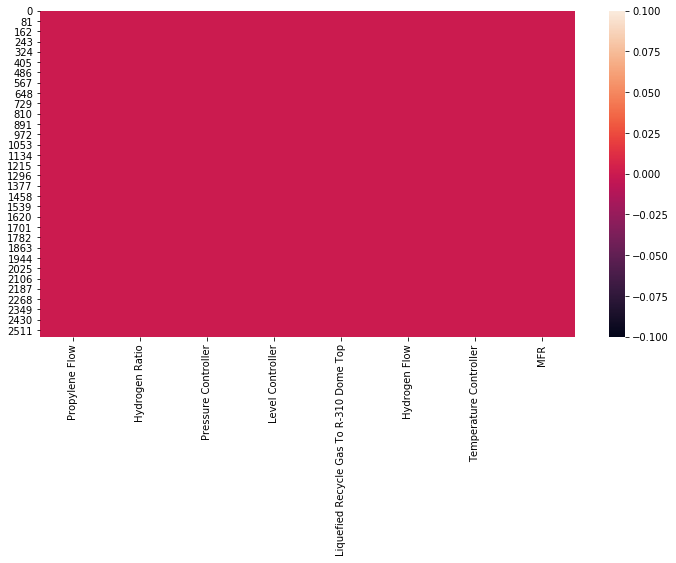

In [32]:
# GETTING THE LARGER SIZE OF AXES

plt.figure(figsize = (12,6))

# CREATING THE HEATMAP

sns.heatmap(new_data.isnull())

In [33]:
# CHECKING THE SUM OF NULL VALUES IN EACH FEATURE AGAIN

new_data.isnull().sum()

Propylene Flow                             0
Hydrogen Ratio                             0
Pressure Controller                        0
Level Controller                           0
Liquefied Recycle Gas To R-310 Dome Top    0
Hydrogen Flow                              0
Temperature Controller                     0
MFR                                        0
dtype: int64

Until now, the missing values in dataset are handeled and there are no categorical columns are present in dataset so no label encoding or one hot encoding is required in dataset.

In [34]:
new_data.head()

,Propylene Flow,Hydrogen Ratio,Pressure Controller,Level Controller,Liquefied Recycle Gas To R-310 Dome Top,Hydrogen Flow,Temperature Controller,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


## Separating the dataset in dependent & independent variables

In [35]:
# TO AVOID THE LARGE EXPONENTIAL VALUES 

np.set_printoptions(suppress = True, precision = 3)

In [36]:
# INDEPENDENT VARIABLES

X = new_data.iloc[:,:-1].values

# DEPENDENT VARIABLES

y = new_data.iloc[:,-1].values

In [37]:
# CHECKING THE INDEPENDENT VARIABLES 

X

array([[24856.584,     0.153,    30.415, ..., 50850.578,     0.164,
           80.4  ],
       [25537.25 ,     0.153,    30.527, ..., 42229.813,     0.13 ,
           78.861],
       [25689.266,     0.153,    30.356, ..., 45335.852,     0.15 ,
           78.818],
       ...,
       [26784.145,     0.   ,    30.296, ...,  9610.465,     0.114,
           78.46 ],
       [26784.145,     0.   ,    30.296, ...,  9610.465,     0.114,
           78.46 ],
       [26784.145,     0.   ,    30.296, ...,  9610.465,     0.114,
           78.46 ]])

In [38]:
# CHECKING THE DEPENDENT VARIABLE

y

array([3.4, 3.2, 3.2, ..., 4. , 3.7, 3.4])

## Train Test Split 

In [39]:
# IMPORTING THE train_test_split

from sklearn.model_selection import train_test_split

# SEPARATING THE X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Feature Scaling

In [40]:
# IMPORTING THE StandardScaler

from sklearn.preprocessing import StandardScaler

# CREATING AN INSTANCE OF StandardScaler()

scaler = StandardScaler()

In [41]:
# SCALING THE X_train

X_train = scaler.fit_transform(X_train)

# SCALING THE X_test

X_test = scaler.fit_transform(X_test)

# CREATING THE MODELS, MAKING PREDICTIONS & CHECKING METRICS

## Creating the Multiple Linear Regression

In [42]:
# IMPORTING THE LinearRegression CLASS

from sklearn.linear_model import LinearRegression

# CREATING AN INSTANCE OF LineaerRegression

lr = LinearRegression()

In [43]:
# FITTING THE MODEL

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# MAKING PREDICTIONS FROM LinearRegression

y_pred_lr = lr.predict(X_test)

## Creating the Polynomial Linear Regression


In [45]:
# IMPORTING THE PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures

# CREATING AN INSTANCE OF PolynomialFeatures WITH DEGREE 2

poly_feat = PolynomialFeatures(degree = 2)

In [46]:
X_train_Pol = poly_feat.fit_transform(X_train)  # FITTING THE X_train TO PolynomialFeatures

X_test_Pol = poly_feat.fit_transform(X_test)    # FITTING THE X_test TO PolynomialFeatures

In [47]:
# IMPORTING THE LinearRegression CLASS

from sklearn.linear_model import LinearRegression

# CREATING AN INSTANCE OF LineaerRegression

lr_poly = LinearRegression()

In [48]:
# FITTING THE MODEL

lr_poly.fit(X_train_Pol, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# MAKIG PREDICTIONS

y_pred_pol = lr_poly.predict(X_test_Pol)

## Creating The Support Vector Regressor

In [50]:
# IMPORTING THE SVR CLASS

from sklearn.svm import SVR

# CREATING AN INSTANCE OF SVR

svr = SVR(kernel = 'rbf')

In [51]:
# FITTING THE MODEL

svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
# MAKING THE PREDICTIONS 

svr_pred = svr.predict(X_test)

## Creating the Decision Tree Regressor

In [53]:
# IMPORTING THE DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

# CREATING AN INSTANCE OF DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [54]:
# FITTING THE MODEL

dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [55]:
# MAKING THE PREDICTIONS

y_pred_dtr = dtr.predict(X_test)

##  Creating the Random Forest Regressor

In [56]:
# IMPORTING THE RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# CREATING AN INSTANCE OF RandomForestRegressor

rfc = RandomForestRegressor(n_estimators = 600, random_state = 42, criterion = 'mse')

In [57]:
# FITTING THE MODEL

rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [58]:
# MAKING PREDICTIONS 

y_pred_rfc = rfc.predict(X_test)

## Evaluating The Models 

In [59]:
# IMPORTING THE METRICS FOR REGRESSION

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
print('The Mean Absolute Error Of Linear Regression: ',mean_absolute_error(y_pred_lr, y_test))
print('The Mean Squared Error Of Linear Regression: ',mean_squared_error(y_pred_lr, y_test))
print('The R2 Score Is: ', r2_score(y_pred_lr, y_test))

The Mean Absolute Error Of Linear Regression:  3.4160848203491145
The Mean Squared Error Of Linear Regression:  15.89010492627432
The R2 Score Is:  -1.3457369222710085


In [61]:
print('The Mean Absolute Error Of Polynomial Regression: ',mean_absolute_error(y_pred_pol, y_test))
print('The Mean Squared Error Of Polynomial Regression: ',mean_squared_error(y_pred_pol, y_test))
print('The R2 Score Is: ', r2_score(y_pred_pol, y_test))

The Mean Absolute Error Of Polynomial Regression:  2.6284846376542434
The Mean Squared Error Of Polynomial Regression:  10.582691675422046
The R2 Score Is:  0.17168934588594686


In [62]:
print('The Mean Absolute Error Of SVR: ',mean_absolute_error(svr_pred, y_test))
print('The Mean Squared Error Of SVR: ',mean_squared_error(svr_pred, y_test))
print('The R2 Score Is: ', r2_score(svr_pred, y_test))

The Mean Absolute Error Of SVR:  1.7942259572508552
The Mean Squared Error Of SVR:  6.793473970316116
The R2 Score Is:  0.560061405896886


In [63]:
print('The Mean Absolute Error Of Decision Tree: ',mean_absolute_error(y_pred_dtr, y_test))
print('The Mean Squared Error Of Decision Tree: ',mean_squared_error(y_pred_dtr, y_test))
print('The R2 Score Is: ', r2_score(y_pred_dtr, y_test))

The Mean Absolute Error Of Decision Tree:  1.7751762523191092
The Mean Squared Error Of Decision Tree:  10.527842565597668
The R2 Score Is:  0.5352481601827548


In [64]:
print('The Mean Absolute Error Of Random Forest: ',mean_absolute_error(y_pred_rfc, y_test))
print('The Mean Squared Error Of Random Forest: ',mean_squared_error(y_pred_rfc, y_test))
print('The R2 Score Is: ', r2_score(y_pred_rfc, y_test))

The Mean Absolute Error Of Random Forest:  1.5611690244222258
The Mean Squared Error Of Random Forest:  6.432656335682897
The R2 Score Is:  0.6323085104215229


The maximum r2 score is 0.6323085104215229 which is of Random Forest Classifier. 